<a href="https://colab.research.google.com/github/crystalloide/Big_Data/blob/master/Votre_1ere_Carte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercice situé à l'origine ici : 
**[Geospatial Analysis Home Page](https://www.kaggle.com/learn/geospatial-analysis)**


# Introduction

Dans ce TP, nous allons utiliser différentes méthodes pour explorer des données géospatiales : données avec une localisation géographique.

<center>
<img src = "https://i.imgur.com/v6ZUGgI.png"> <br/>
</center>

En suivant le TP, vous aller pouvoir proposer des solutions à plusieurs problèmes du monde réel, tels que :
- Où un organisme humanitaire devrait-il étendre son action dans les régions reculées des Philippines ?
- Comment les hirondelles noires, une espèce d'oiseau menacée, voyagent-elles entre l'Amérique du Nord et l'Amérique du Sud? Les oiseaux voyagent-ils vers des zones de conservation ?
- Quelles régions du Japon pourraient potentiellement bénéficier d'un renforcement supplémentaire des dispositifs en cas de séisme ?
- Quels magasins Starbucks en Californie seraient de bons candidats pour devenir le prochain [Starbucks Reserve Roastery] ?
(https://www.forbes.com/sites/garystern/2019/01/22/starbucks-reserve-roastery-its-spacious-and-trendy-but-why-is-starbucks-slowing-down-expansion/#6cb80d4a1bc6)
- La ville de New York dispose-t-elle d’hôpitaux en nombre suffisant pour faire face aux accidents de véhicules à moteur? Quelles zones de la ville ont des lacunes dans leur couverture?

Vous pourrez également :
- visualiser le crime dans la ville de Boston
- examiner les établissements de santé du Ghana
- explorer les meilleures universités d'Europe
- et suivre les rejets de produits chimiques toxiques aux États-Unis.

Dans ce premier TP, nous allons voir rapidement les pré-requis nécessaires
Si vous souhaitez approfondir le sujet, nous vous recommandons le cours **[Pandas micro-course](https://www.kaggle.com/learn/pandas)**.  

Nous allons également commencer à visualiser notre premier jeu de données géospatiales!

<div class = "alert alert-block alert-info">
Pour créer votre propre copie de ce bloc-notes (où vous pouvez exécuter votre propre code),
<b> <a href="https://www.kaggle.com/kernels/fork/5832150"> cliquez ici </a>. </b>.
</div>


# Lecture des données

La première étape consiste à lire certaines données géospatiales : 
Pour cela, nous allons utiliser la bibliothèque [GeoPandas](http://geopandas.org/).


In [46]:
!rm -rf /root/.pyenv
!apt-get update
!apt-get upgrade
#!apt-get install -y make build-essential libssl-dev zlib1g-dev libbz2-dev libreadline-dev libsqlite3-dev wget curl llvm libncurses5-dev git
!apt-get install make build-essential libssl-dev zlib1g-dev libbz2-dev libreadline-dev libsqlite3-dev wget curl llvm libncurses5-dev git
!apt-get install libssl1.0
!apt-get install openssl-devel -y
# !apt autoremove
# !rm -rf /root/.pyenv

!curl -L "https://raw.githubusercontent.com/yyuu/pyenv-installer/master/bin/pyenv-installer" | bash


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Calcula

In [47]:
!/root/.pyenv/bin/pyenv install 3.6.0


-> https://www.python.org/ftp/python/3.6.0/Python-3.6.0.tar.xz
Installing Python-3.6.0...
Installed Python-3.6.0 to /root/.pyenv/versions/3.6.0



In [1]:
!/root/.pyenv/bin/pyenv global 3.6.0
!/root/.pyenv/bin/pyenv versions

  system
* 3.6.0 (set by /root/.pyenv/version)


In [0]:
# !python3 -v

import _frozen_importlib # frozen
import _imp # builtin
import sys # builtin
import '_warnings' # <class '_frozen_importlib.BuiltinImporter'>
import '_thread' # <class '_frozen_importlib.BuiltinImporter'>
import '_weakref' # <class '_frozen_importlib.BuiltinImporter'>
import '_frozen_importlib_external' # <class '_frozen_importlib.FrozenImporter'>
import '_io' # <class '_frozen_importlib.BuiltinImporter'>
import 'marshal' # <class '_frozen_importlib.BuiltinImporter'>
import 'posix' # <class '_frozen_importlib.BuiltinImporter'>
import _thread # previously loaded ('_thread')
import '_thread' # <class '_frozen_importlib.BuiltinImporter'>
import _weakref # previously loaded ('_weakref')
import '_weakref' # <class '_frozen_importlib.BuiltinImporter'>
# installing zipimport hook
import 'zipimport' # <class '_frozen_importlib.BuiltinImporter'>
# installed zipimport hook
# /usr/lib/python3.6/encodings/__pycache__/__init__.cpython-36.pyc matches /usr/lib/python3.6/encodings/__init__.py
# code o

In [2]:
!pip install --upgrade geopandas
import geopandas as gpd

     |████████████████████████████████| 921kB 3.3MB/s 
     |████████████████████████████████| 11.8MB 13.6MB/s 
     |████████████████████████████████| 10.1MB 40.3MB/s 


Il existe de très nombreux formats de fichiers géospatiaux, tels que [shapefile](https://en.wikipedia.org/wiki/Shapefile), [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language) et [GPKG](https://en.wikipedia.org/wiki/GeoPackage). 

Nous ne discuterons pas de leurs différences ici, mais il est important de rappeler que: 
- shapefile (fichier de formes) est le type de fichier le plus courant  
- tous ces types de fichiers peuvent être rapidement chargés avec la fonction 'gpd.read_file()' . 

La cellule de code suivante charge un shapefile contenant des informations sur les forêts, les zones sauvages et d'autres endroits,
sous gestion du [Département de la conservation de l'environnement](https://www.dec.ny.gov/index.html) dans l'état de New York.


In [5]:
# Ici on va récupérer les fichiers précis DEC_lands*.* sur le poste local et l'uploader ensuite dans /content sur google colaboratory 
# Décommentez ci-dessous pour refaire l'upload :
from google.colab import files
files.upload()
%ls

Saving DEC_lands.cpg to DEC_lands.cpg
Saving DEC_lands.dbf to DEC_lands.dbf
Saving DEC_Lands.html to DEC_Lands.html
Saving DEC_lands.prj to DEC_lands.prj
Saving DEC_lands.sbn to DEC_lands.sbn
Saving DEC_lands.sbx to DEC_lands.sbx
Saving DEC_lands.shp.xml to DEC_lands.shp.xml
Saving DEC_lands.shx to DEC_lands.shx
DEC_lands.cpg  DEC_Lands.html  DEC_lands.sbn  DEC_lands.shp      DEC_lands.shx
DEC_lands.dbf  DEC_lands.prj   DEC_lands.sbx  DEC_lands.shp.xml  sample_data/


In [6]:
# Lecture des données
full_data = gpd.read_file("DEC_lands.shp")

# Affichons les 5 premières lignes du fichier de données
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


Comme vous pouvez le voir dans la colonne "CLASS", chacune des cinq premières lignes correspond à une forêt différente. 
Pour le reste du TP, imaginez que vous souhaitez utiliser ces données pour planifier un week-end en camping. 

Au lieu de vous fier aux avis en ligne provenant d'internet, vous décidez de créer votre propre carte. 

De cette façon, vous pouvez adapter le voyage à vos propres centre d'intérêts. 

# Prérequis
Pour visualiser les cinq premières lignes des données, nous avons utilisé la méthode `head ()`. 
Vous vous souvenez peut-être que c'est ainsi que nous avions visualisés un DataFrame Pandas.

En fait, chaque commande que vous lancerez sur un DataFrame s'appliquera aux données.
En effet, les données ont été chargées dans un objet GeoPandas **GeoDataFrame** qui possède toutes les propritétés d'un DataFrame (Pandas).

In [7]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

Si nous n'avons pas besoin d'utiliser toutes les colonnes, nous pouvons donc sélectionner le sous-ensemble qui nous intéresse.

(_Pour consulter d'autres méthodes de sélection des données, consultez [ce didacticiel] (https://www.kaggle.com/residentmario/indexing-selecting-assigning/) dans le micro-cours Pandas_.)

In [0]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

Nous utilisons la méthode `value_counts()` pour voir une liste des différents types de terrains, ainsi que le nombre de fois où ils apparaissent dans le fichier. 
(_Pour approfondir ce point (et les méthodes associées), consultez [ce tutoriel] (https://www.kaggle.com/residentmario/summary-functions-and-maps) dans le micro-cours Pandas._)

In [10]:
# Combien de sortes de terrains existe-t-il?
data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

Vous pouvez également utiliser `loc` (et`iloc`) et `isin` pour sélectionner des sous-ensembles de données. 
(_Pour revoir cela, consultez [ce tutoriel](https://www.kaggle.com/residentmario/indexing-selecting-assigning/) du micro-cours Pandas._)

In [11]:
# Selectionnons les terrains de la catégorie "WILD FOREST" ou "WILDERNESS"
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


Si vous n'êtes pas familier avec les commandes ci-dessus, nous vous encourageons à mettre cette page en favori, 
afin de pouvoir rechercher les commandes selon vos besoins. 
(_Alternativement, vous pouvez suivre le [micro-cours Pandas] (https://www.kaggle.com/learn/pandas) ._) 
Nous utiliserons ces commandes tout au long de ce micro-cours pour comprendre et filtrer les données avant de créer des cartes .

# Créez votre première carte!

Nous pouvons visualiser rapidement les données avec la méthode `plot()`.


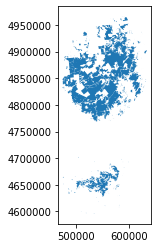

In [12]:
wild_lands.plot()

Chaque GeoDataFrame contient une colonne spéciale : "geométry". 
Il contient tous les objets géométriques qui sont affichés lorsque nous appelons la méthode `plot()`.

In [13]:
# Affichons les 5 premères valeurs de la colonne "geometry" :
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

Bien que cette colonne puisse contenir plusieurs types de données différents, chaque entrée sera généralement un **Point**, une ligne  **LineString**, ou un polygone **Polygon**.

![](https://i.imgur.com/N1llefr.png)

La colonne "geometry" de notre fichier contient 2983 objets Polygones différents, chacun correspondant à une forme différente dans le graphique ci-dessus.

Dans la cellule de code ci-dessous, nous créons trois GeoDataFrames supplémentaires, contenant les emplacements de camping (**Point**), les sentiers pédestres (**LineString**) et les limites du comté (**Polygon**).

In [18]:
# Ici on va récupérer les fichiers précis DEC_pointsinterest/*, DEC_roadstrails/* et NY_county_boundaries/* sur le poste local et l'uploader ensuite dans /content sur google colaboratory 
# Décommentez ci-dessous pour refaire l'upload :
from google.colab import files
files.upload()
%ls

Saving NY_county_boundaries.cpg to NY_county_boundaries.cpg
Saving NY_county_boundaries.dbf to NY_county_boundaries.dbf
Saving NY_county_boundaries.prj to NY_county_boundaries.prj
Saving NY_county_boundaries.shp to NY_county_boundaries.shp
Saving NY_county_boundaries.shx to NY_county_boundaries.shx
DEC_lands.cpg           Decptsofinterest.dbf      Decroadstrails.sbn
DEC_lands.dbf           Decptsofinterest.prj      Decroadstrails.sbx
DEC_Lands.html          Decptsofinterest.sbn      Decroadstrails.shp
DEC_lands.prj           Decptsofinterest.sbx      Decroadstrails.shp.xml
DEC_lands.sbn           Decptsofinterest.shp      Decroadstrails.shx
DEC_lands.sbx           Decptsofinterest.shp.xml  NY_county_boundaries.cpg
DEC_lands.shp           Decptsofinterest.shx      NY_county_boundaries.dbf
DEC_lands.shp.xml       Decroadstrails.CPG        NY_county_boundaries.prj
DEC_lands.shx           Decroadstrails.dbf        NY_county_boundaries.shp
DEC_pointsinterest.htm  DECroadstrails.html       N

In [0]:
# Campings de l'état de New York state (Point)
POI_data = gpd.read_file("Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Sentiers pédestres de l'état de New York (LineString)
roads_trails = gpd.read_file("Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# Limites du comté de l'état de New York state (Polygon)
counties = gpd.read_file("NY_county_boundaries.shp")

Ensuite, nous créons une carte à partir des quatre GeoDataFrames.

La méthode `plot()` prend comme entrée (facultative) plusieurs paramètres qui peuvent être utilisés pour personnaliser l'apparence. 

Plus important encore, définir une valeur pour «ax» garantit que toutes les informations seront tracées sur la même carte.

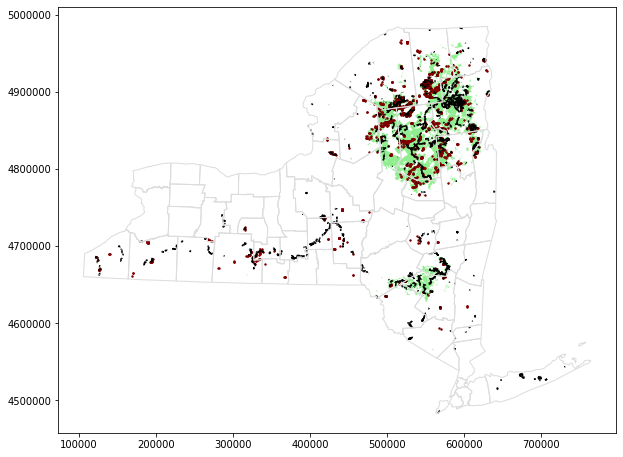

In [21]:
# Définition de la carte de base avec les limites du comté
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Ajoutons ensuite les terres sauvages, les campings et les sentiers pédestres à la carte de base
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

Il semble donc que le nord-est de l'État de New York ferait un excellent choix pour un week-end de camping itinérant !

# À votre tour

Cela semble complexe au début, mais vous savez déjà ce qu'il faut pour faire une analyse importante. 
Voyez vous-même comme vous ** [identifiez les régions éloignées](https://www.kaggle.com/kernels/fork/5832167)** des Philippines où un organisme humanitaire pourrait étendre ses activités.



**[Geospatial Analysis Home Page](https://www.kaggle.com/learn/geospatial-analysis)**

* Vous avez des questions ou des commentaires? Visitez le [forum de discussion sur l’apprentissage] (https://www.kaggle.com/learn-forum)  pour discuter avec d’autres apprenants
